# equipo de lorenzo ismael jimenez lara y Ramon Ochoa Mendez 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 


In [ ]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ", header=None)
data.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "class"]
data.head(5)

In [4]:
X = data.iloc[:,:-1]
y = data[["class"]]

In [5]:
# dividimos las variables de entrenamiento y purba 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6,random_state=45)

In [17]:
modelo_dt = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2,min_samples_leaf=1,max_features=12)
modelo_dt.fit(X_train, y_train)
modelo_dt.score(X_test, y_test)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7996\4086118547.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_dt.fit(X_train, y_train)


0.9021739130434783

In [ ]:
                 # iniciamos con el bosque aleatorio 

#1. en un ciclo for el modelo base

n_for = 100
accAD = list()
for k in range(n_for):
    modelo_AD = RandomForestClassifier()
    modelo_AD.fit(X_train, y_train)
    tmp =  modelo_AD.score(X_test, y_test)
    accAD.append(tmp)

print('Bosque aleatorio con parametros por default\npromedio y desviacion estandar: %.1f%% (%.1f)' % (100*np.mean(accAD),100*np.std(accAD) ))
pd.DataFrame(accAD)
plt.show()
    


In [ ]:
#2. en un ciclo for el modelo con hiper parámetros 

n_for = 100
accAD2 = list()
for k in range(n_for):
    modelo_AD = RandomForestClassifier(criterion= "gini", 
                                       max_depth=None,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features=12)

    modelo_AD.fit(X_train, y_train)
    tmp =  modelo_AD.score(X_test, y_test)
    accAD2.append(tmp)

print('Bosque aleatorio con parametros por default\npromedio y desviacion estandar: %.1f%% (%.1f)' % (100*np.mean(accAD),100*np.std(accAD) ))
pd.DataFrame(accAD)
plt.show()

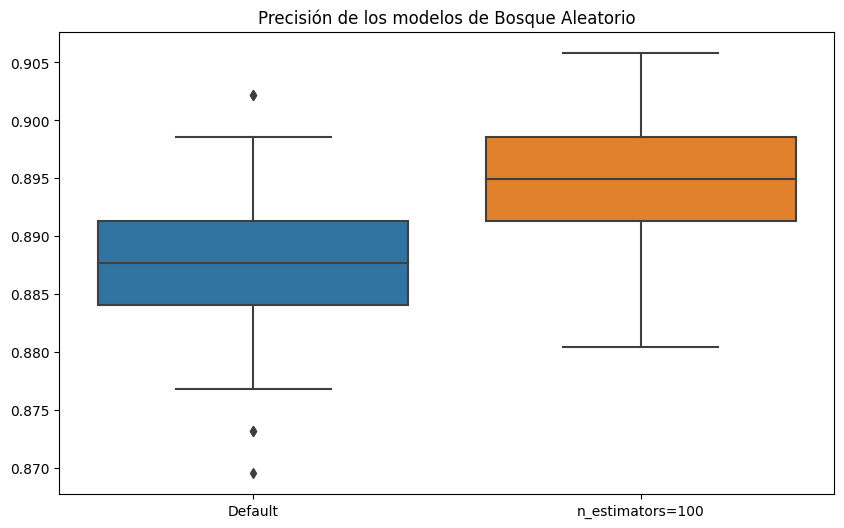

In [29]:
# 3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 
accAD_df = pd.DataFrame({'Default': accAD, 'n_estimators=100': accAD_2})

plt.figure(figsize=(10,6))
sns.boxplot(data=accAD_df)
plt.title('Precisión de los modelos de Bosque Aleatorio')
plt.show()


In [ ]:
df_accAD = pd.DataFrame({'Modelo 1': accAD, 'Modelo 2': accAD2})
fig, ax = plt.subplots()
bp = ax.boxplot(df_accAD.values)
ax.set_xticklabels(['Modelo 1', 'Modelo 2'])
plt.show()

ahora pasamos al segundo metodo que es el Linear Support Vector Classifier

In [47]:
# primero entrenamos el modelo

modelo_sv = LinearSVC(C=0.1,penalty="l1",dual=False)
modelo_sv.fit(X_train, y_train)
modelo_sv.score(X_test, y_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8913043478260869

In [59]:
# 1. en un ciclo for el modelo base
n_for = 10
accAD3 = list()
for k in range(n_for):
    modelo_AD = LinearSVC()
    modelo_AD.fit(X_train, y_train)
    tmp =  modelo_AD.score(X_test, y_test)
    accAD3.append(tmp)

print('Linear svc con parametros por default\npromedio y desviacion estandar: %.1f%% (%.1f)' % (100*np.mean(accAD),100*np.std(accAD) ))
pd.DataFrame(accAD)
plt.show()
    

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Linear svc con parametros por default
promedio y desviacion estandar: 73.1% (5.3)


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# 2. en un ciclo for el modelo con hiper parámetros 
n_for = 10
accAD4 = list()
for k in range(n_for):
    modelo_AD = LinearSVC(C=0.1,
                          penalty="l1",
                          dual=False)

    modelo_AD.fit(X_train, y_train)
    tmp =  modelo_AD.score(X_test, y_test)
    accAD4.append(tmp)

print('Arbol de decision con parametros por default\npromedio y desviacion estandar: %.1f%% (%.1f)' % (100*np.mean(accAD),100*np.std(accAD) ))
pd.DataFrame(accAD)
plt.show()

In [ ]:
# 3. Graficar los boxplot, ambos que se muestren en la misma gráfica.
 
df_accAD = pd.DataFrame({'Modelo 1': accAD3, 'Modelo 2': accAD4})
fig, ax = plt.subplots()
bp = ax.boxplot(df_accAD.values)
ax.set_xticklabels(['Modelo 1', 'Modelo 2'])
plt.show()


